In [16]:
from herbie import Herbie
import xarray as xr 
import cartopy.crs as ccrs
import torch 
from goes2go.data import  goes_nearesttime
import numpy as np

from main import tools

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import cartopy.feature as cfeature


In [17]:
data_sets = []
date = "2021-08-18"
minutes = 60
hours = 1
XY_UV = []
time_list = tools.generate_time_ranges(date, minutes, hours)
total_times = len(time_list)
for i in range(0,len(time_list)):
    ds = goes_nearesttime(time_list[i], 
                                product='ABI-L2-DMWVC',
                                return_as="xarray")
    ds = ds.dropna(dim = "nMeasures")
    wspd = ds.wind_speed.values
    wdir = ds.wind_direction.values
    wdir = np.deg2rad(wdir)

    u = torch.tensor(-wspd * np.sin(wdir)).unsqueeze(1)
    v = torch.tensor(-wspd * np.cos(wdir)).unsqueeze(1)
    UV = torch.cat([u,v], dim = -1)
    
    lonlat = ds.lon.values, ds.lat.values[::-1]

ds2 = goes_nearesttime(time_list[0], 
                                    satellite="noaa-goes16", 
                                    product="ABI-L2-MCMIP", 
                                    domain = "C",
                                    return_as="xarray")
    
    

📦 Finished downloading [1] files to [/home/yf297/data/noaa-goes16/ABI-L2-DMWVC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [18]:
# We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
dat = ds2.metpy.parse_cf('CMI_C02')

geos = dat.metpy.cartopy_crs
s = tools.Lambert_proj.transform_points(
        ccrs.Geodetic(), 
        lonlat[0],
        lonlat[1])[:,0:2]

In [20]:
x = s[:,0]
y = s[:,1]

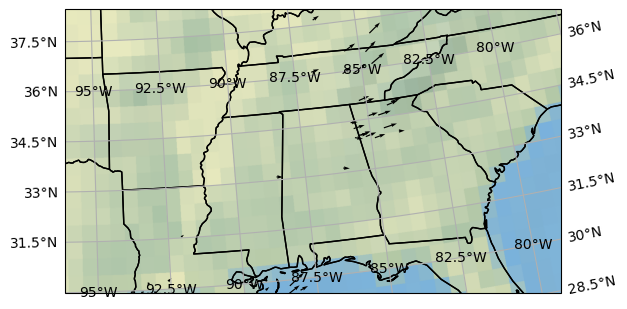

In [ ]:
res = '50m'
extent =[-96, -79, 30, 37]
lonW, lonE, latS, latN = extent
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=tools.Lambert_proj)
ax.set_extent([lonW, lonE, latS, latN], crs=tools.Geodetic_proj)
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature(cfeature.STATES.with_scale(res))
ax.stock_img()
ax.gridlines(draw_labels=True)


ax.quiver(x, y, UV[:,0], UV[:,1])

In [22]:
# We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
dat = ds2.metpy.parse_cf('CMI_C02')

geos = dat.metpy.cartopy_crs
s = tools.Lambert_proj.transform_points(
        ccrs.Geodetic(), 
        lonlat[0],
        lonlat[1])[:,0:2]

In [3]:
import pickle

In [4]:
with open('goes/datas/datas_fit.pkl', 'rb') as f:
    datas = pickle.load(f)

/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


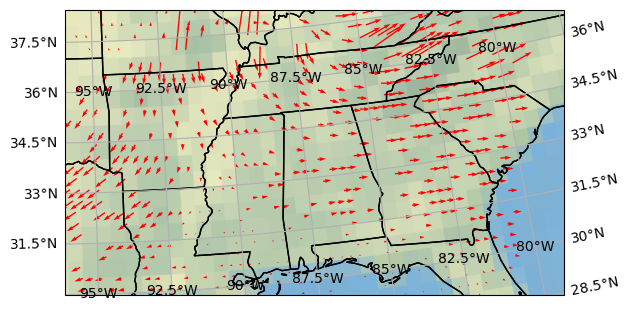

In [7]:
f = datas[0].plot_vel(datas[0].indices[:500])